In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I

In [17]:
archiveAll = 'dataAll.txt'
dataAll = np.fromfile(archiveAll)
lenAll = int(len(dataAll)/3)
dataAll = np.reshape(dataAll, (lenAll,3)) 
# Eu sei que é (m,1,3), mas na prática não vimos muita diferença então colocamos (m,3)

dataAll

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [18]:
w = np.random.uniform(low=-0.5,high=0.5,size=2)
x = dataAll
err = np.repeat(1, len(x)) #
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err)):
    epoca += 1
    print("Época",epoca)
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            w = w + n*(yd-y)*xd
            print(w)
        else:
            err[i] = 0

Pesos iniciais: [-0.35818654  0.40331482]
Época 1
[ 36.02065346 -24.01091518]
[ -17.63839654 -100.50666518]
[ 55.15762346 -64.67710518]
[137.75632346  15.17872482]
[143.60208346 -63.11586518]
[ 103.59317346 -141.00855518]
[157.26298346 -91.91628518]
[ 104.30292346 -148.78574518]
[163.86244346 -98.66341518]
[ 118.33781346 -164.29934518]
[209.05367346 -89.58602518]
[ 151.27268346 -149.89417518]
[ 103.00612346 -198.36389518]
[ 173.45347346 -156.24762518]
[ 126.61147346 -207.65749518]
[ 196.47510346 -143.43855518]
[ 140.63937346 -199.61608518]
[ 217.62684346 -134.76675518]
[ 181.35680346 -177.99479518]
[ 163.11766346 -196.32843518]
[ 238.54010346 -130.27332518]
[ 174.18097346 -212.69576518]
[ 265.48918346 -129.42499518]
[ 218.44435346 -217.32893518]
Época 2
[ 170.17779346 -265.79865518]
[ 240.04142346 -201.57971518]
[ 184.20569346 -257.75724518]
[ 261.19316346 -192.90791518]
[ 224.92312346 -236.13595518]
[ 307.81499346 -153.35446518]
[ 261.66761346 -210.00384518]
[ 235.04199346 -242.526215

In [19]:
print("Foram feitos",aj,"ajustes")
print("E se levaram",epoca,"épocas")

# O número total de ajustes no vetor de pesos;
# (b) O número de épocas até a convergência;
# (c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
# obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
# cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.
# x2 = 1.000369759x1

Foram feitos 55 ajustes
E se levaram 4 épocas


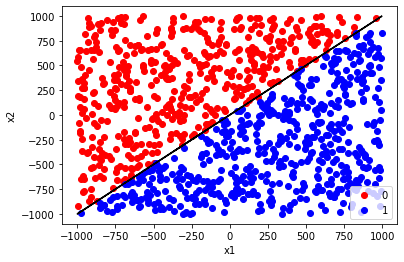

In [20]:
import pandas as pd

df = pd.DataFrame(dataAll, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")
        
x_ = np.array(df['x1'])
y = x_ * (-w[0]/w[1])

plt.plot(x_, y,'black')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

# Parte II

Pesos iniciais: [-23.67343023 -88.84054764]
Taxa de aprendizado: 0.4
Intervalo: -100.0 100.0
Pesos finais: [0.40073474 0.44572402]
Épocas passadas: 100
Quantidade de certos: 525 / 600



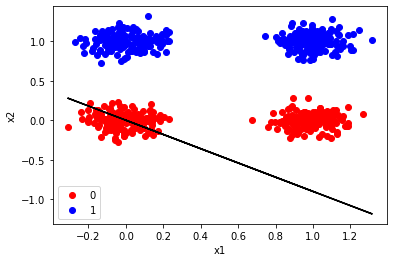

Pesos iniciais: [0.72502625 0.81122174]
Taxa de aprendizado: 0.4
Intervalo: -1.0 1.0
Pesos finais: [0.41200971 0.44505432]
Épocas passadas: 100
Quantidade de certos: 526 / 600



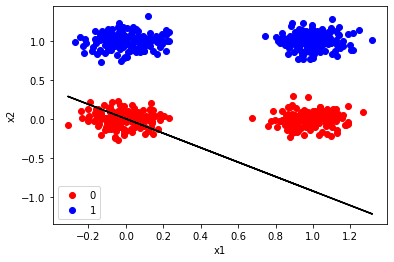

Pesos iniciais: [0.17915033 0.4445716 ]
Taxa de aprendizado: 0.4
Intervalo: -0.5 0.5
Pesos finais: [0.31743813 0.49462139]
Épocas passadas: 100
Quantidade de certos: 527 / 600



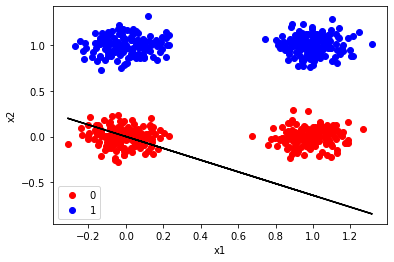

Pesos iniciais: [ 58.72895471 -75.82001264]
Taxa de aprendizado: 0.1
Intervalo: -100.0 100.0
Pesos finais: [0.07846803 0.12505382]
Épocas passadas: 100
Quantidade de certos: 528 / 600



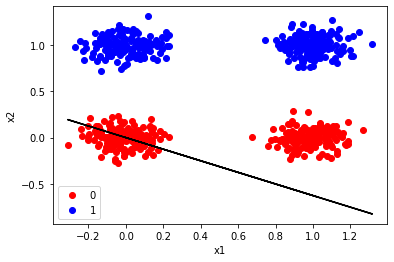

Pesos iniciais: [-0.47650395 -0.31442887]
Taxa de aprendizado: 0.1
Intervalo: -1.0 1.0
Pesos finais: [0.10323667 0.10888862]
Épocas passadas: 100
Quantidade de certos: 524 / 600



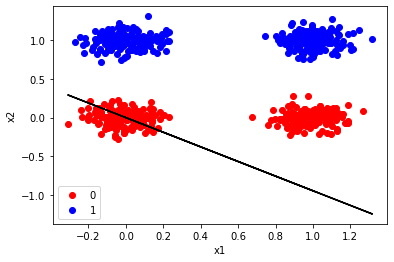

Pesos iniciais: [-0.26661521 -0.17855255]
Taxa de aprendizado: 0.1
Intervalo: -0.5 0.5
Pesos finais: [0.10444542 0.10705131]
Épocas passadas: 100
Quantidade de certos: 526 / 600



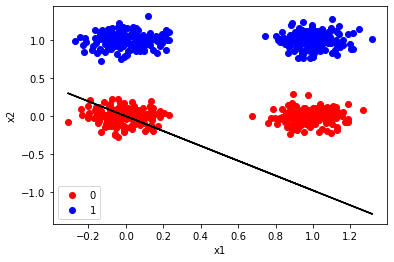

Pesos iniciais: [-35.13855796  24.94686132]
Taxa de aprendizado: 0.01
Intervalo: -100.0 100.0
Pesos finais: [-20.1299142   28.93317408]
Épocas passadas: 100
Quantidade de certos: 518 / 600



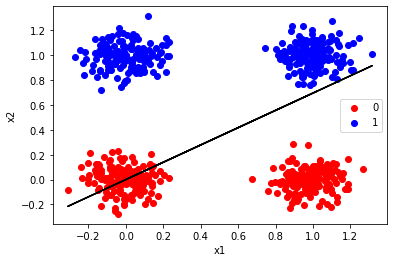

Pesos iniciais: [0.63781878 0.36117551]
Taxa de aprendizado: 0.01
Intervalo: -1.0 1.0
Pesos finais: [0.00815939 0.00923628]
Épocas passadas: 100
Quantidade de certos: 527 / 600



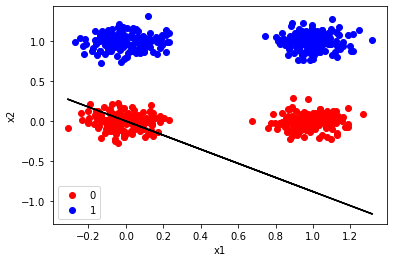

Pesos iniciais: [-0.14472845  0.12604281]
Taxa de aprendizado: 0.01
Intervalo: -0.5 0.5
Pesos finais: [0.01039541 0.01083786]
Épocas passadas: 100
Quantidade de certos: 522 / 600



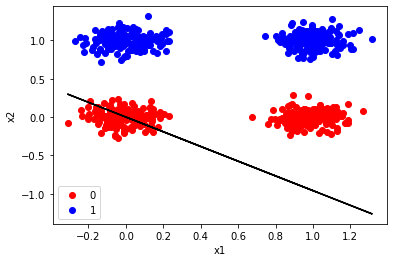

In [21]:
# Hiago - 1515280014
# Alex - 1515080008

archive = 'data' + str((4+8) % 4) + '.txt'
data0 = np.fromfile(archive)
len0 = int(len(data0)/3)
data0 = np.reshape(data0, (len0,3))

nl = np.array([0.4,0.1,0.01])
Il = np.array([100, 1, 0.5])
wl = np.array([])
ajl = np.array([])

for N in nl:
    for I in Il:
        w = np.random.uniform(low=-I,high=I,size=2)
        x = data0
        err = np.repeat(1, len(x))
        n = N
        aj = 0
        print("Pesos iniciais:",w)
        epoca = 0
        l = []
        while (np.isin(1, err) and epoca < 100):
            epoca += 1
            for i in range(len(x)):
                yd = x[i][2]
                xd = np.array([x[i][0],x[i][1]])
                sigma = w[0]*xd[0]+w[1]*xd[1]
                if (sigma >= 0): # função degrau
                    y = 1
                else:
                    y = 0
                if (y != yd):
                    err[i] = 1
                    aj += 1
                    
                    w = w + n*(yd-y)*xd
                    #print(w)
                else:
                    err[i] = 0
        print("Taxa de aprendizado:",n)
        print("Intervalo:",-I,I)
        print("Pesos finais:",w)
        print("Épocas passadas:",epoca)
        print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))
        print()
        
        wl = np.append(wl,w)
        ajl = np.append(ajl, aj)
        
        df = pd.DataFrame(data0, columns=['x1', 'x2', 'y'])

        x0 = np.array(df[df['y'] == 0]) 
        x1 = np.array(df[df['y'] == 1]) 

        X = [x0, x1]
        colors = ["red", "blue"]

        for x, c in zip(X, colors):
            if c == "red":
                plt.scatter(x[:,0], x[:,1], color = c, label = "0")
            else:
                plt.scatter(x[:,0], x[:,1], color = c, label = "1")

        x_ = np.array(df['x1'])
        y = x_ * (-w[0]/w[1])

        plt.plot(x_, y,'black')

        plt.legend()
        plt.xlabel("x1")
        plt.ylabel("x2")

        plt.show()
wl = np.reshape(wl, (9,2))

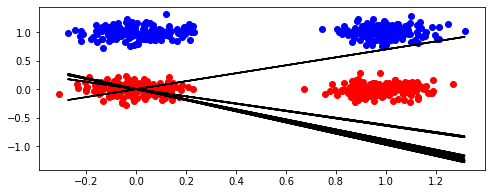

In [22]:
df = pd.DataFrame(data0, columns=['x1', 'x2', 'y'])
x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")

fig = plt.gcf()
fig.set_size_inches(8, 3)
for i in range(len(wl)):
    y = x*(-wl[i][0]/wl[i][1])
    plt.plot(x, y, color='black')
plt.show()

0.4007347398954028 0.445724021172463
0.4120097109805096 0.445054324625963
0.317438129952916 0.49462138812681034
0.0784680281499423 0.12505381899348325
0.10323667263215998 0.10888862377330713
0.10444542468575117 0.10705131128410317
-20.129914204543418 28.933174078693078
0.00815939021431599 0.009236278347644985
0.010395406555449759 0.010837859206206698
Média dos ajustes: 7802.333333333333
Desvio padrão dos ajustes: 640.1209955070126


,média,desvio padrão
0,7802.333333,640.120996


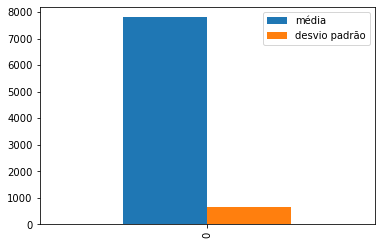

In [23]:
for i in wl:
    print(i[0],i[1])
print("Média dos ajustes:", ajl.mean())
print("Desvio padrão dos ajustes:",ajl.std())

table = pd.DataFrame([[ajl.mean(), ajl.std()]], columns=['média', 'desvio padrão'])

table.plot(kind='bar')

table.head()

# Parte III

In [24]:
archive = 'dataHoldout.txt'
dataH = np.fromfile(archive)
dataH = np.reshape(dataH, (int(len(dataH)/3),3))
dataH

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [25]:
# Fazendo o split 70%-30%

np.random.shuffle(dataH)

# Define a size for your train set 
train_size = int(0.7 * len(dataH))

# Split your dataset 
train_set = dataH[:train_size]
test_set = dataH[train_size:]

In [26]:
w = np.random.uniform(low=-1.0,high=1.0,size=2)
x = train_set
err = np.repeat(1, len(x))
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err) and epoca < 100):
    epoca += 1
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            
            w = w + n*(yd-y)*xd
            #print(w)
        else:
            err[i] = 0
    np.random.shuffle(train_set)
    # Randomizando o treinamento ao fim de cada época
print("Pesos finais:",w)
print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))

Pesos iniciais: [0.68784992 0.26241663]
Pesos finais: [-0.10297292 -0.0262191 ]
Quantidade de certos: 459 / 560


In [27]:
x = train_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1
confusion_matrix = np.array([[tp,fp],[fn, tn]])
print("Quantidade de certos:",right,"/",len(x))
tpTrain = tp
fpTrain = fp
fnTrain = fn
tnTrain = tn
rightTrain = right
confusion_matrix

Quantidade de certos: 467 / 560


array([[ 64,  18],
       [ 75, 403]])

In [28]:
x = test_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1

confusion_matrix = np.array([[tp,fp],[fn, tn]])
tpTest = tp
fpTest = fp
fnTest = fn
tnTest = tn
print("Quantidade de certos:",right,"/",len(x))
confusion_matrix

Quantidade de certos: 202 / 240


array([[ 28,   5],
       [ 33, 174]])

## Métricas de desempenho

In [29]:
# Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
acTrain = rightTrain/train_size
print("Acurácia do treino:",acTrain)
# Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F -Score;
precTrain = tpTrain/(tpTrain+fpTrain)
revoTrain = tpTrain/(tpTrain+fnTrain)
FScoreTrain = (2*(precTrain*revoTrain))/(precTrain+revoTrain)
print("Precisão do treino:",precTrain)
print("Revocação do treino:",revoTrain)
print("F-Score do treino:",FScoreTrain)

Acurácia do treino: 0.8339285714285715
Precisão do treino: 0.7804878048780488
Revocação do treino: 0.460431654676259
F-Score do treino: 0.579185520361991


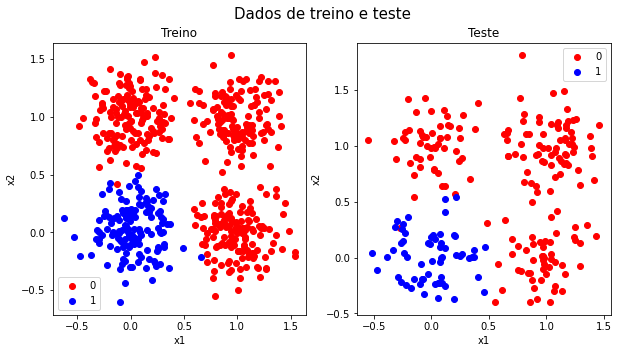

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Dados de treino e teste', fontsize=15)

axs[0].set_title('Treino')
axs[1].set_title('Teste')

axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')


df = pd.DataFrame(train_set, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        axs[0].scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        axs[0].scatter(x[:,0], x[:,1], color = c, label = "1")
    

df = pd.DataFrame(test_set, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        axs[1].scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        axs[1].scatter(x[:,0], x[:,1], color = c, label = "1")

axs[0].legend()
axs[1].legend()
      
plt.show()